In [189]:
import pandas as pd
import numpy as np

import seaborn as sns #gráficas
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Preparar la data


In [190]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-06-trees/CreditScoring.csv"

In [191]:
!wget $data

--2025-07-24 21:09:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.7’

CreditScoring.csv.7 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2025-07-24 21:09:25 (11.6 MB/s) - ‘CreditScoring.csv.7’ saved [182489/182489]



In [192]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [193]:
df = pd.read_csv(data) #se le pasa en enlace del csv

In [194]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [195]:
df.columns = df.columns.str.lower()

In [196]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Los valores categóricos se muestran con valores de 1 a 5, por lo que hay que cambiarlos

In [197]:
df.status.value_counts() #para ver cuantos valores diferentes existen en la variable status

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [198]:
status_values = {1: 'ok', 
                 2: 'default', 
                 0: 'unk'}
df.status = df.status.map(status_values) #reemplazamos los valores 1, 2 y 0 en status por los valores a la derecha

home_values = {1: 'rent', 
                2: 'owner',
                3: 'private',
                4: 'ignore',
                5: 'parent',
                6: 'other',
                0: 'unk'}
df.home = df.home.map(home_values) 

marital_values = {1: 'single', 
                2: 'married', 
                3: 'widow',
                4: 'separated',
                5: 'divorced',
                0: 'unk'}

df.marital = df.marital.map(marital_values)

records_values = {1: 'no', 
                 2: 'yes', 
                 0: 'unk'}
df.records = df.records.map(records_values)


job_values = {1: 'fixed', 
                2: 'partime',
                3: 'freelance', 
                4: 'others', 
                0: 'unk'}
df.job = df.job.map(job_values)

In [199]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [200]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [201]:
 df.income.max() #revisamos los valores mas altos, 99999999 índica NA en este CSV

np.int64(99999999)

In [202]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [203]:
df.income.max()

np.float64(959.0)

In [204]:
df.describe().round() #ya no se ven los 99999999

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


### Dado que tenemos valores en los que el status es desconocido y no nos sirve, podemos filtrarlo

In [205]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [206]:
from sklearn.model_selection import train_test_split #para dividir el dataframe

In [207]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=11)

In [208]:
len(df_train), len(df_val), len(df_test)

(2850, 713, 891)

In [209]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [210]:
df_train.status

0       ok
1       ok
2       ok
3       ok
4       ok
        ..
2845    ok
2846    ok
2847    ok
2848    ok
2849    ok
Name: status, Length: 2850, dtype: object

### Convertimos los valores de df_train.status a 0 y 1

In [211]:
df_train.status.value_counts()

status
ok         2068
default     782
Name: count, dtype: int64

### Creamos un vector con los resultados de los tres datasets

In [212]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

### Borramos los resultados de los datasets para solo tenerlos en los vectores

In [213]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.3 Arboles de decisión


In [214]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return ok
        else:
            return 'default'
            

In [215]:
xi = df_train.iloc[0].to_dict()

In [216]:
assess_risk(xi)

'default'

### Entrenar un decision tree

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #para las variables categoricas
from sklearn.metrics import roc_auc_score

In [218]:
train_dicts = df_train.fillna(0).to_dict(orient='records') #registros del dataframe en diccionario y reemplazamos los NA

### Entramos el dict_vectorizer para las variables categóricas

In [219]:
dv = DictVectorizer(sparse=False) #dict vectorizer hallaba las variables categoricas y creaba una columna por cada una diferente 
X_train = dv.fit_transform(train_dicts) # se le pasaba un diccionario de ejemplo y se le pide que transforme los valores

In [220]:
X_train; 

In [221]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parent', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

### Entrenamos el classifier

In [222]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) #entrenamos el clasifier del decision tree

DecisionTreeClassifier()

### Usamos el dict_vectorizer ya fitteado para las variables categóricas en validation y test dataset

In [223]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Valores que predice el decision tree comparados con el validation dataset

In [224]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [225]:
roc_auc_score(y_val, y_pred)

np.float64(0.6515211267605634)

### Valores que predice el decision tree comparados con el train dataset

In [226]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

#### Estos resultados se deben al overfitting, lo que quiere decir que el modelo simplemente esta memorizando los valores, por eso el AUC con el dataset entrenado es 1, mientras que con el de validación es solo de 0.6. Para limitar el overfitting hay que limitar el tamaño del arbol de decisión

In [227]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train) #entrenamos el clasifier del decision tree pero maximizando el tamaño del arbol 

DecisionTreeClassifier(max_depth=3)

In [228]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation', auc)

train 0.7700033886231307
validation 0.7477511737089203


In [229]:
from sklearn.tree import export_text

In [230]:
export_text(dt) #decisiones del decision tree

'|--- feature_26 <= 0.50\n|   |--- feature_16 <= 0.50\n|   |   |--- feature_12 <= 74.50\n|   |   |   |--- class: 0\n|   |   |--- feature_12 >  74.50\n|   |   |   |--- class: 0\n|   |--- feature_16 >  0.50\n|   |   |--- feature_2 <= 8750.00\n|   |   |   |--- class: 1\n|   |   |--- feature_2 >  8750.00\n|   |   |   |--- class: 0\n|--- feature_26 >  0.50\n|   |--- feature_27 <= 6.50\n|   |   |--- feature_27 <= 1.50\n|   |   |   |--- class: 1\n|   |   |--- feature_27 >  1.50\n|   |   |   |--- class: 1\n|   |--- feature_27 >  6.50\n|   |   |--- feature_12 <= 103.50\n|   |   |   |--- class: 1\n|   |   |--- feature_12 >  103.50\n|   |   |   |--- class: 0\n'

## 6.4 Algoritmo del arbol

In [231]:
data = [
[8000, 3000, 'default'],
[2000, 1000, 'default'],
[ 0, 1000,'default'],
[5000, 1000,'ok'],
[5000, 1000,'ok'],
[4000, 1000,'ok'],
[9000, 500,'ok'],
[3000, 2000,'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [232]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [233]:
thresholds = {
    'assets': [0, 2000,3000,4000,5000,8000],
    'debt': [500, 1000, 2000]
}

In [234]:
from IPython.display import display

In [235]:
"""for T in thresholds['assets']:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print('-----------------')""";

In [236]:
"""for feature, Ts in thresholds.items():
    print('############')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print('-----------------')"""

"for feature, Ts in thresholds.items():\n    print('############')\n    print(feature)\n    for T in Ts:\n        print(T)\n        df_left = df_example[df_example[feature] <= T]\n        df_right = df_example[df_example[feature] > T]\n\n\n        display(df_left)\n        print(df_left.status.value_counts(normalize=True))\n        display(df_right)\n        print(df_right.status.value_counts(normalize=True))\n        print('-----------------')"

### Se busca que el porcentaje de error en cada clasificación sea el menor posible, este porcentaje se llama Impurity

## 6.5 Decission trees parameters

In [238]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d) 
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.607
   2 -> 0.676
   3 -> 0.748
   4 -> 0.773
   5 -> 0.770
   6 -> 0.781
  10 -> 0.707
  15 -> 0.660
  20 -> 0.644
None -> 0.663


#### Probamos con diferentes numeros de hojas

In [243]:
scores=[]

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s) 
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        #print('(%4s, %3d) -> %.3f' % (d, s, auc))

In [246]:
df_scores = pd.DataFrame(scores, columns=['Tamaño','Hojas','Auc'])
df_scores.head()

,Tamaño,Hojas,Auc
0,4,1,0.773089
1,4,2,0.773089
2,4,5,0.773089
3,4,10,0.773089
4,4,15,0.773413


In [249]:
df_scores.sort_values(by='Auc',ascending=False);

In [253]:
df_scores_pivot = df_scores.pivot(index='Hojas', columns=['Tamaño'], values=['Auc'])
df_scores_pivot

Auc                    
Tamaño         4         5         6
Hojas                               
1       0.773089  0.769836  0.776784
2       0.773089  0.769836  0.780094
5       0.773089  0.770709  0.777085
10      0.773089  0.769549  0.776089
15      0.773413  0.779056  0.787507
20      0.766479  0.784122  0.791977
100     0.766854  0.780474  0.783000
200     0.763911  0.771653  0.781122
500     0.696667  0.696667  0.696667

<Axes: xlabel='None-Tamaño', ylabel='Hojas'>

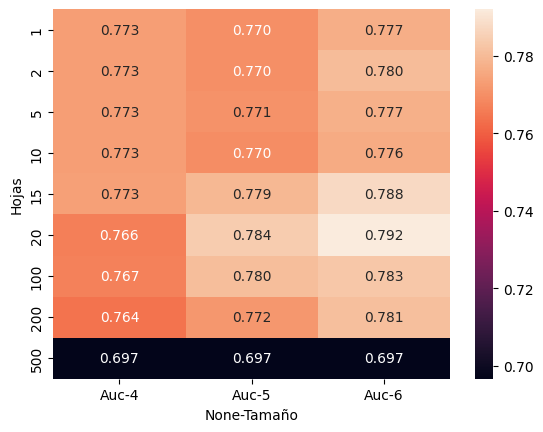

In [254]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

## 6.6 Random Forest 

#### Diferentes arboles de decisión y se toma un promedio de la probabilidad obtenida por cada uno

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [265]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.7806384976525822)

In [273]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train);
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [280]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc']);

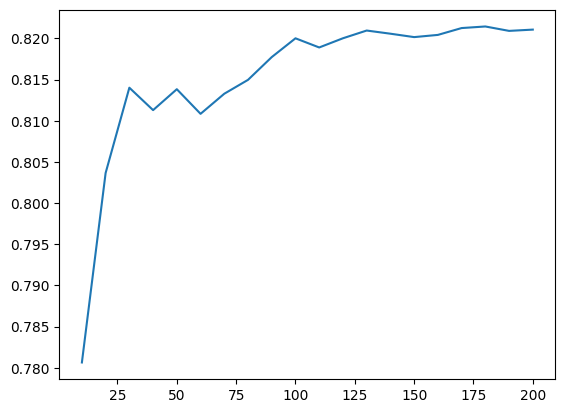

In [281]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [282]:
scores = []

for d in [5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train);
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, n, auc))

In [283]:
df_scores = pd.DataFrame(scores, columns=['depth', 'n_estimators', 'auc'])

In [284]:
df_scores.head()

,depth,n_estimators,auc
0,5,10,0.812131
1,5,20,0.812718
2,5,30,0.816568
3,5,40,0.813714
4,5,50,0.813826


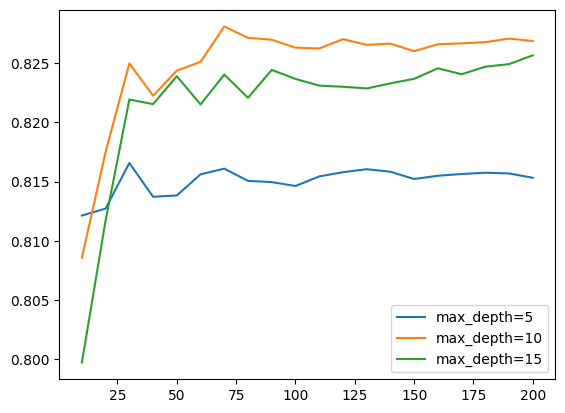

In [288]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

In [ ]:
scores = []

for s in [1,3,5,10,50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, min_samples_leaf=s, max_depth=10 random_state=1)
        rf.fit(X_train, y_train);
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((s, n, auc))

In [293]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

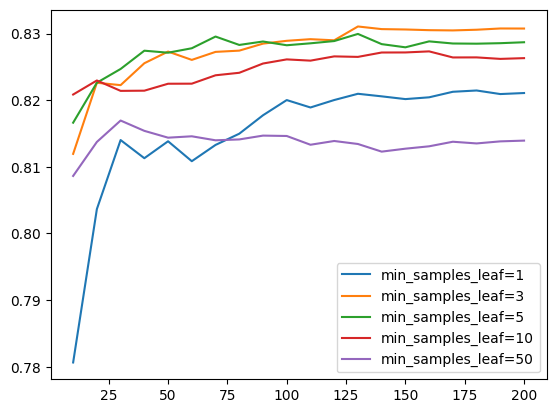

In [294]:
for s in [1,3,5,10,50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples_leaf=%s' % s)

plt.legend()